Importações


In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split # Utilizado para separar dados de treino e teste
from sklearn.preprocessing import StandardScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import LabelEncoder # Utilizado para fazer o OneHotEncoding
from sklearn.linear_model import LinearRegression # Algoritmo de Regressão Linear
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
from sklearn.metrics import r2_score, accuracy_score


Importando Arquivos de Classificação por Rodada

In [198]:
classificacao_brasileirao_2003_2021_df = pd.read_csv("df_classificacao.csv")
classificacao_brasileirao_2023_df = pd.read_csv("Classificacao_por_Rodada_2023.csv")

In [199]:
display(classificacao_brasileirao_2003_2021_df)
display(classificacao_brasileirao_2023_df)

,Time,Temporada,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
0,Atlético-MG,2003,1,1,3,1,0,0,3,0,3,1,0,1,1
1,Guarani,2003,1,2,3,1,0,0,4,2,2,1,0,1,-1
2,Criciúma,2003,1,3,3,1,0,0,2,0,2,1,0,1,1
3,Athletico-PR,2003,1,4,3,1,0,0,2,0,2,1,0,1,1
4,São Paulo,2003,1,5,1,0,0,1,2,2,0,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15287,Juventude,2021,38,16,46,11,14,13,36,44,-8,1,0,2,1
15288,Grêmio,2021,38,17,43,12,19,7,44,51,-7,1,0,8,-3
15289,Bahia,2021,38,18,43,11,17,10,42,51,-9,0,1,4,-1
15290,Sport,2021,38,19,38,9,18,11,24,37,-13,0,0,2,-3


,Time,Temporada,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
0,Fluminense,2023,1,1,3,1,0,0,3,0,3,1,0,1,1
1,Flamengo,2023,1,2,3,1,0,0,3,0,3,1,0,1,1
2,Athletico-PR,2023,1,3,3,1,0,0,2,0,2,1,0,1,1
3,Palmeiras,2023,1,4,3,1,0,0,2,1,1,1,0,1,-1
4,Vasco,2023,1,5,3,1,0,0,2,1,1,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Bahia,2023,38,16,44,12,18,8,50,53,-3,1,0,2,-7
756,Santos,2023,38,17,43,11,17,10,39,64,-25,0,3,1,-4
757,Goiás,2023,38,18,38,9,18,11,36,53,-17,1,0,1,1
758,Coritiba,2023,38,19,30,8,24,6,41,73,-32,0,2,-2,-4


Importando Arquivos dos Jogos Por rodada

In [200]:
rodadas_brasileirao_2003_2021_df = pd.read_csv("df_rodadas.csv")
rodadas_brasileirao_2023_df = pd.read_csv("Rodadas_Realizadas_2023.csv")

In [201]:
display(rodadas_brasileirao_2003_2021_df)
display(rodadas_brasileirao_2023_df)

,Temporada,Rodada,Mandante,Visitante,Mandante Placar,Visitante Placar
0,2003,1,Guarani,Vasco,4,2
1,2003,1,Athletico-PR,Grêmio,2,0
2,2003,1,Juventude,São Paulo,2,2
3,2003,1,Cruzeiro,São Caetano,2,2
4,2003,1,Flamengo,Coritiba,1,1
...,...,...,...,...,...,...
7641,2021,38,Fortaleza,Bahia,2,1
7642,2021,38,Sport,Athletico-PR,1,1
7643,2021,38,Bragantino,Internacional,1,0
7644,2021,38,Juventude,Corinthians,1,0


,Temporada,Rodada,Mandante,Visitante,Mandante Placar,Visitante Placar
0,2023,1,Palmeiras,Cuiabá,2,1
1,2023,1,América-MG,Fluminense,0,3
2,2023,1,Botafogo,São Paulo,2,1
3,2023,1,Bragantino,Bahia,2,1
4,2023,1,Athletico-PR,Goiás,2,0
...,...,...,...,...,...,...
375,2023,38,Cruzeiro,Palmeiras,1,1
376,2023,38,Internacional,Botafogo,3,1
377,2023,38,Coritiba,Corinthians,0,2
378,2023,38,Bahia,Atlético-MG,4,1


In [202]:
classificacao_brasileirao_2003_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15292 entries, 0 to 15291
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Time                   15292 non-null  object
 1   Temporada              15292 non-null  int64 
 2   Rodada                 15292 non-null  int64 
 3   Posicao                15292 non-null  int64 
 4   Pontos                 15292 non-null  int64 
 5   Vitoria                15292 non-null  int64 
 6   Derrota                15292 non-null  int64 
 7   Empate                 15292 non-null  int64 
 8   Gols_pro               15292 non-null  int64 
 9   Gols_contra            15292 non-null  int64 
 10  Saldo_de_gols          15292 non-null  int64 
 11  Vitorias_consecutivas  15292 non-null  int64 
 12  Derrotas_consecutivas  15292 non-null  int64 
 13  Jogos_marcando         15292 non-null  int64 
 14  Jogos_sem_sofrer_gols  15292 non-null  int64 
dtypes: int64(14), objec

In [203]:
rodadas_brasileirao_2003_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7646 entries, 0 to 7645
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Temporada         7646 non-null   int64 
 1   Rodada            7646 non-null   int64 
 2   Mandante          7646 non-null   object
 3   Visitante         7646 non-null   object
 4   Mandante Placar   7646 non-null   int64 
 5   Visitante Placar  7646 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 358.5+ KB


In [204]:
classificacao_brasileirao_2003_2021_df.isnull().sum()

Time                     0
Temporada                0
Rodada                   0
Posicao                  0
Pontos                   0
Vitoria                  0
Derrota                  0
Empate                   0
Gols_pro                 0
Gols_contra              0
Saldo_de_gols            0
Vitorias_consecutivas    0
Derrotas_consecutivas    0
Jogos_marcando           0
Jogos_sem_sofrer_gols    0
dtype: int64

In [205]:
rodadas_brasileirao_2003_2021_df.isnull().sum()

Temporada           0
Rodada              0
Mandante            0
Visitante           0
Mandante Placar     0
Visitante Placar    0
dtype: int64

In [206]:
classificacao_2006_2021_df = classificacao_brasileirao_2003_2021_df.loc[classificacao_brasileirao_2003_2021_df["Temporada"]>=2006]
rodadas_2006_2021_df = rodadas_brasileirao_2003_2021_df.loc[rodadas_brasileirao_2003_2021_df["Temporada"]>=2006]



In [207]:
classificacao_df = classificacao_2006_2021_df.copy()
classificacao_df.head()

,Time,Temporada,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
3132,Grêmio,2006,1,1,3,1,0,0,2,0,2,1,0,1,1
3133,Juventude,2006,1,2,3,1,0,0,1,0,1,1,0,1,1
3134,São Paulo,2006,1,3,3,1,0,0,1,0,1,1,0,1,1
3135,São Caetano,2006,1,4,3,1,0,0,2,1,1,1,0,1,-1
3136,Botafogo,2006,1,5,3,1,0,0,1,0,1,1,0,1,1


In [208]:
classificacao_df.describe()

,Temporada,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
count,12160.000000,12160.000000,12160.000000,12160.000000,12160.000000,12160.000000,12160.000000,12160.000000,12160.000000,12160.000000,12160.000000,12160.000000,12160.000000,12160.000000
mean,2013.500000,19.500000,10.500000,26.593832,7.093832,7.093832,5.312336,24.267105,24.267105,0.000000,0.575905,0.581414,1.939062,-2.744572
std,4.609962,10.966307,5.766518,16.834118,4.836550,4.872939,3.485637,15.249345,15.188956,10.166587,0.966583,0.998700,3.307099,3.725430
min,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000,0.000000,0.000000,-8.000000,-35.000000
25%,2009.750000,10.000000,5.750000,13.000000,3.000000,3.000000,2.000000,12.000000,12.000000,-5.000000,0.000000,0.000000,-1.000000,-4.000000
50%,2013.500000,19.500000,10.500000,25.000000,7.000000,6.000000,5.000000,23.000000,23.000000,0.000000,0.000000,0.000000,1.000000,-2.000000
75%,2017.250000,29.000000,15.250000,39.000000,10.000000,10.000000,8.000000,35.000000,35.000000,5.000000,1.000000,1.000000,3.000000,-1.000000
max,2021.000000,38.000000,20.000000,90.000000,28.000000,29.000000,17.000000,86.000000,80.000000,53.000000,9.000000,12.000000,25.000000,1.000000


In [209]:
rodadas_df = rodadas_2006_2021_df.copy()
rodadas_df.head()

,Temporada,Rodada,Mandante,Visitante,Mandante Placar,Visitante Placar
1566,2006,1,Juventude,Paraná,1,0
1567,2006,1,Vasco,Internacional,1,1
1568,2006,1,Grêmio,Corinthians,2,0
1569,2006,1,São Paulo,Flamengo,1,0
1570,2006,1,São Caetano,Cruzeiro,2,1


In [210]:
rodadas_df.describe()

,Temporada,Rodada,Mandante Placar,Visitante Placar
count,6080.000000,6080.000000,6080.000000,6080.000000
mean,2013.500000,19.500000,1.499507,0.993586
std,4.610151,10.966758,1.198645,1.007518
min,2006.000000,1.000000,0.000000,0.000000
25%,2009.750000,10.000000,1.000000,0.000000
50%,2013.500000,19.500000,1.000000,1.000000
75%,2017.250000,29.000000,2.000000,2.000000
max,2021.000000,38.000000,6.000000,7.000000


Trabalhando com classificacao

In [211]:
variaveis_numericas = []
for i in classificacao_df.columns[0:16].tolist():
        if classificacao_df.dtypes[i] == 'int64' or classificacao_df.dtypes[i] == 'float64':            
            print(i, ':' , classificacao_df.dtypes[i]) 
            variaveis_numericas.append(i)

Temporada : int64
Rodada : int64
Posicao : int64
Pontos : int64
Vitoria : int64
Derrota : int64
Empate : int64
Gols_pro : int64
Gols_contra : int64
Saldo_de_gols : int64
Vitorias_consecutivas : int64
Derrotas_consecutivas : int64
Jogos_marcando : int64
Jogos_sem_sofrer_gols : int64


In [212]:
variaveis_numericas

['Temporada',
 'Rodada',
 'Posicao',
 'Pontos',
 'Vitoria',
 'Derrota',
 'Empate',
 'Gols_pro',
 'Gols_contra',
 'Saldo_de_gols',
 'Vitorias_consecutivas',
 'Derrotas_consecutivas',
 'Jogos_marcando',
 'Jogos_sem_sofrer_gols']

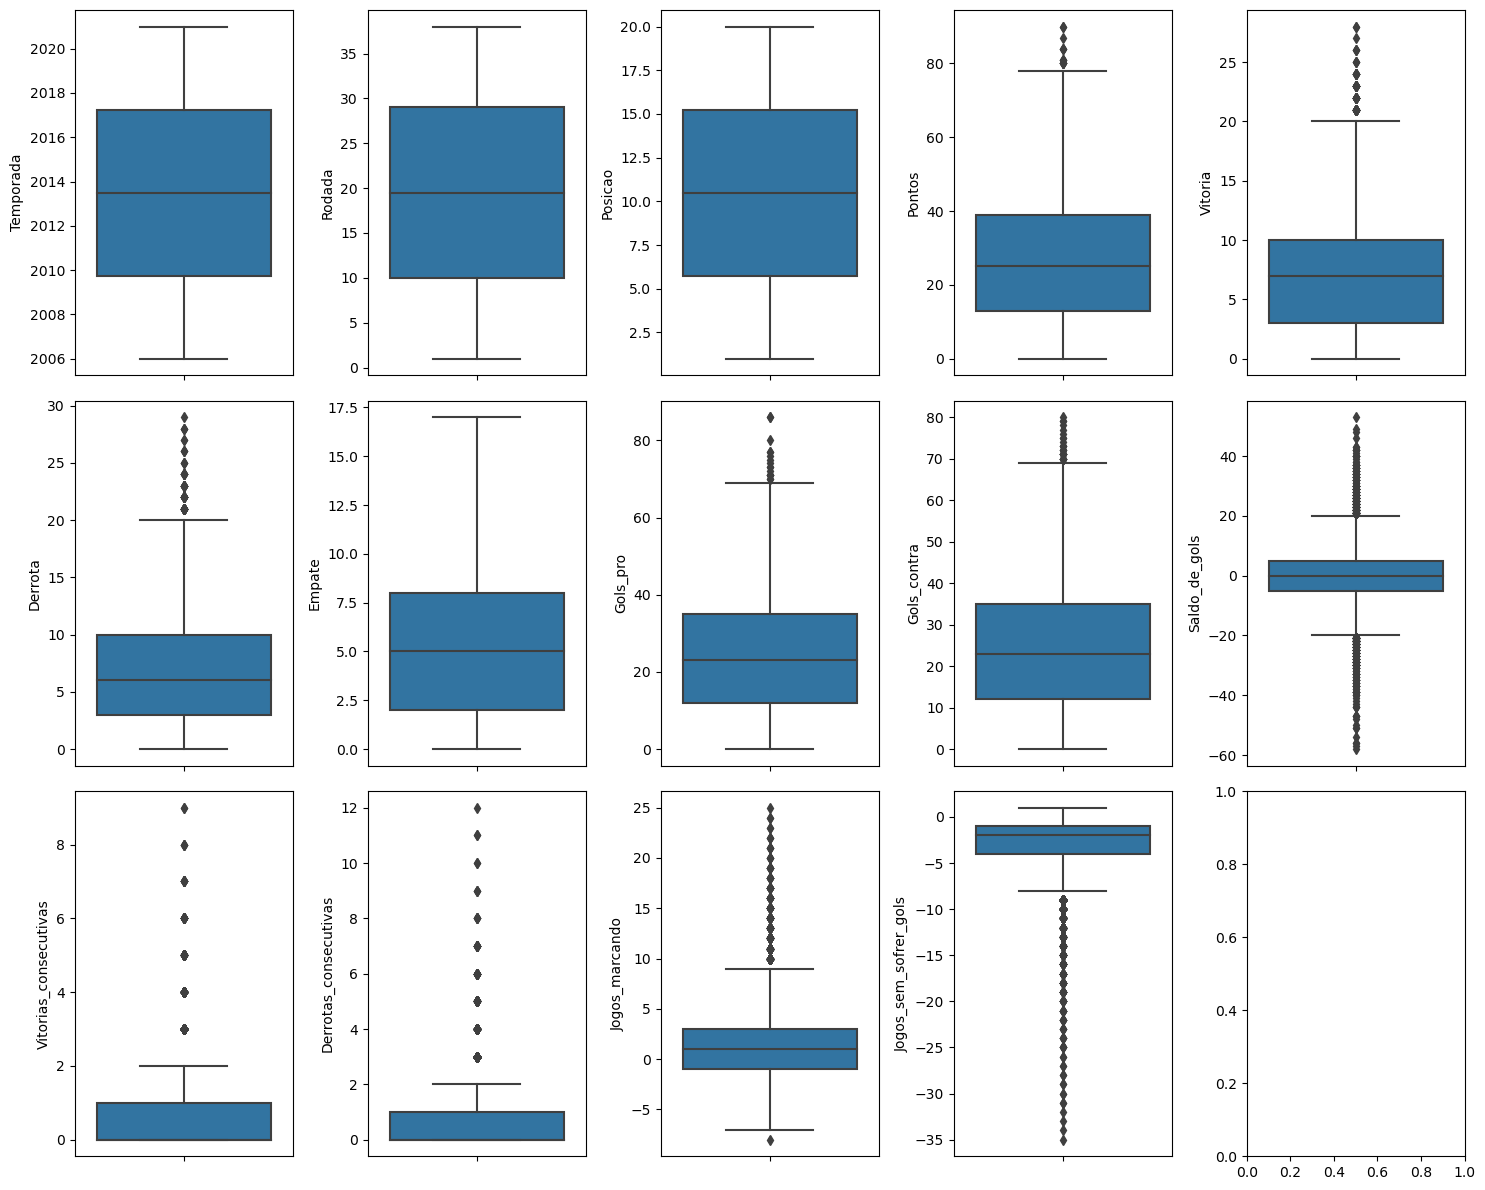

In [213]:
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3, 5) #2 linhas e 5 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = classificacao_df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0            

plt.show()

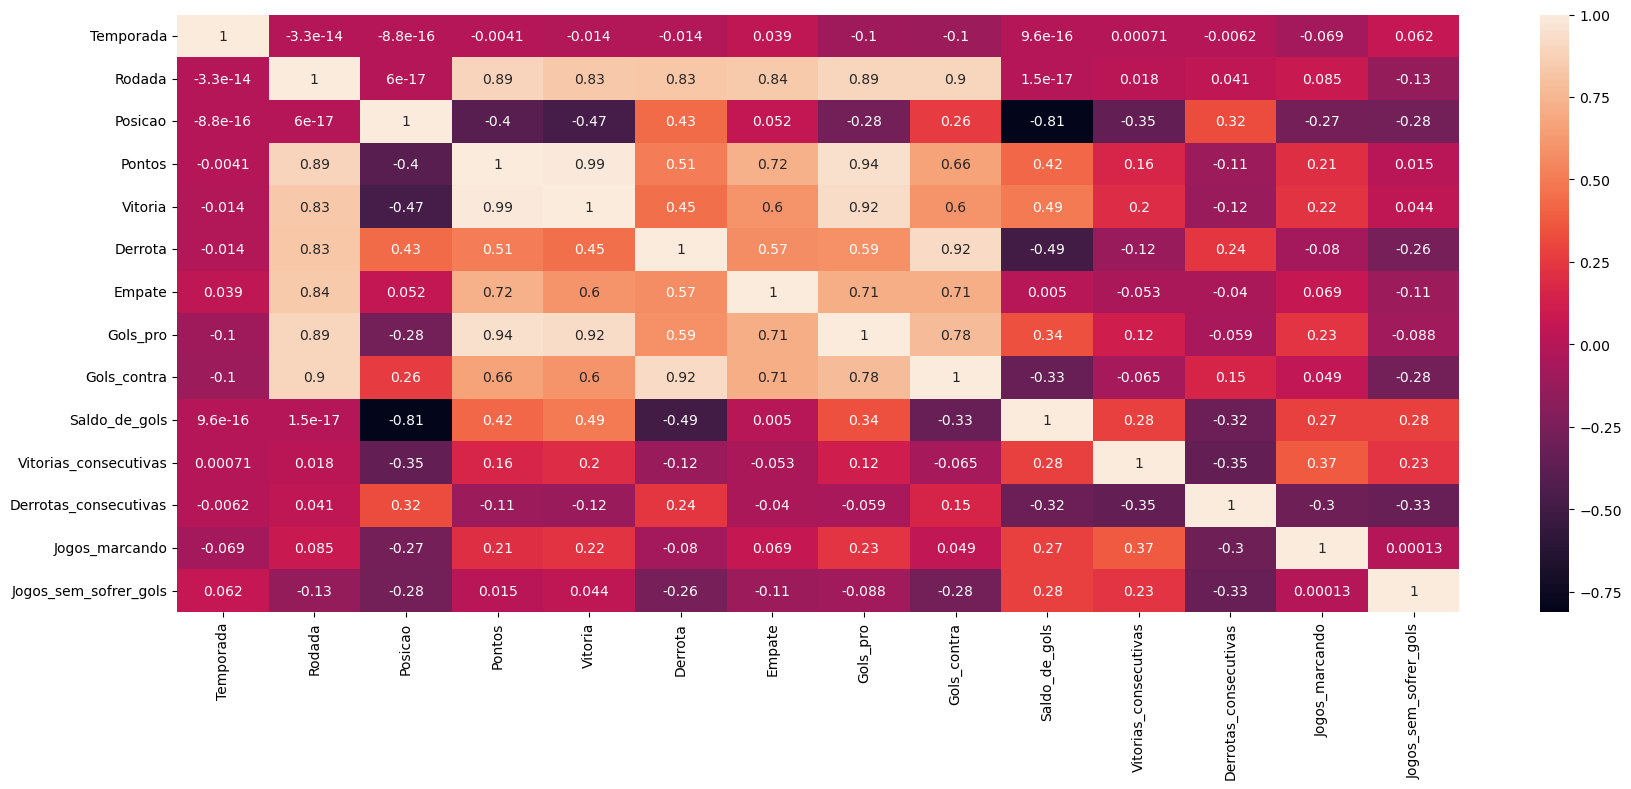

In [214]:
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.heatmap(classificacao_df.corr(), annot=True) 

In [215]:
def seleciona_dataframe_ano(class_df, ano):
    result = class_df.loc[class_df["Temporada"] == ano]
    return result

In [216]:
df_2019 = seleciona_dataframe_ano(classificacao_df, 2019)

In [217]:
display(df_2019)

,Time,Temporada,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
13012,Ceará,2019,1,1,3,1,0,0,4,0,4,1,0,1,1
13013,Palmeiras,2019,1,2,3,1,0,0,4,0,4,1,0,1,1
13014,Athletico-PR,2019,1,3,3,1,0,0,4,1,3,1,0,1,-1
13015,São Paulo,2019,1,4,3,1,0,0,2,0,2,1,0,1,1
13016,Chapecoense,2019,1,5,3,1,0,0,2,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,Ceará,2019,38,16,39,10,19,9,36,41,-5,0,0,1,-7
13768,Cruzeiro,2019,38,17,36,7,16,15,27,46,-19,0,5,-4,-5
13769,CSA,2019,38,18,32,8,22,8,24,58,-34,0,3,1,-12
13770,Chapecoense,2019,38,19,32,7,20,11,31,52,-21,0,0,2,-1


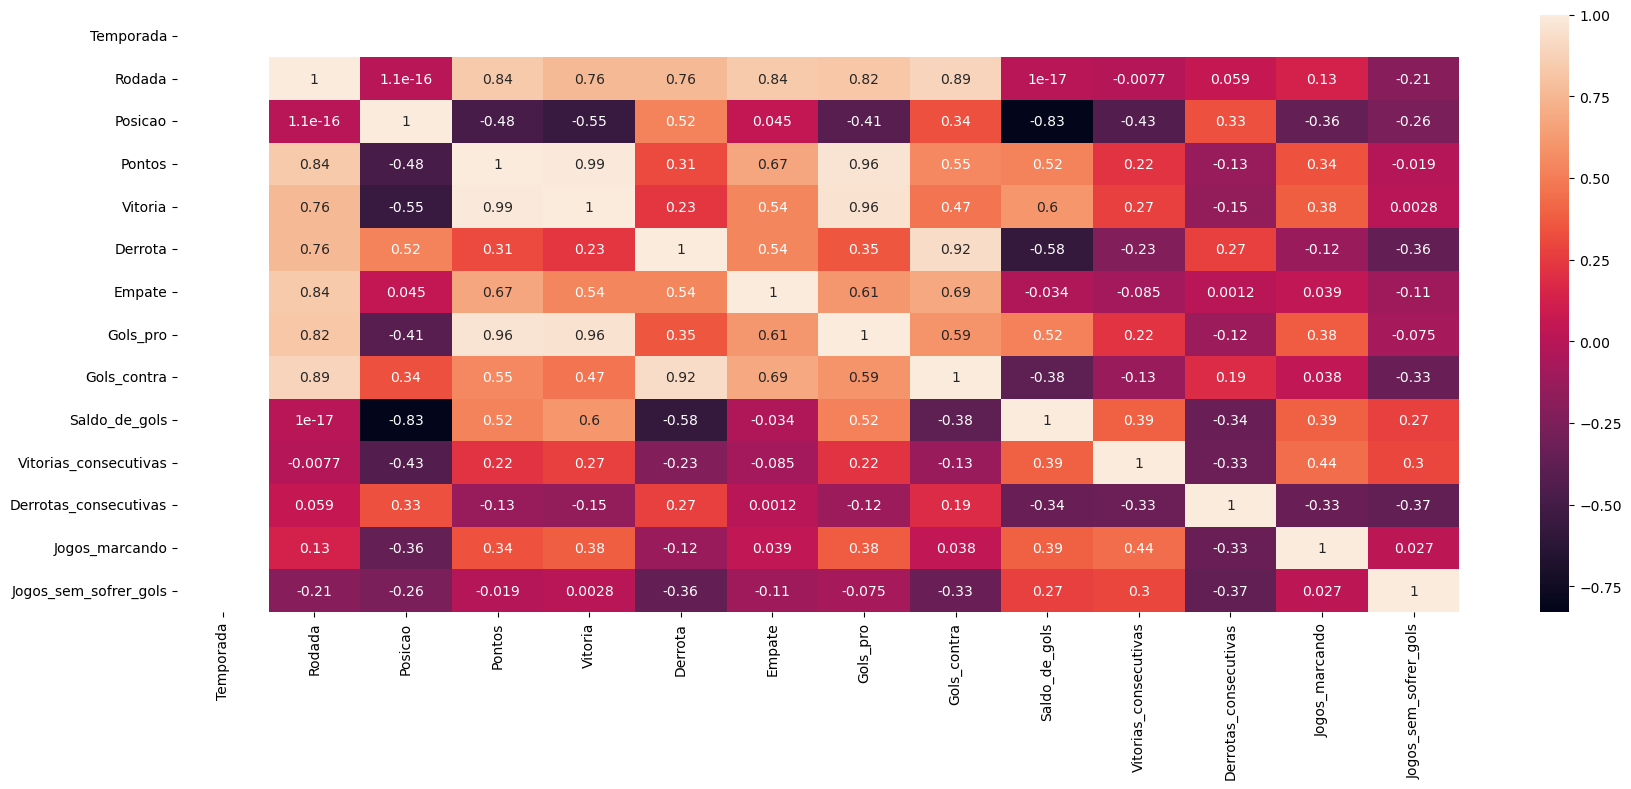

In [218]:
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.heatmap(df_2019.corr(), annot=True) 

In [219]:
def seleciona_dataframe_ano_rodada(class_df, rodada):
    result = class_df.loc[class_df["Rodada"] == rodada]
    return result

In [220]:
df_30 = seleciona_dataframe_ano_rodada(classificacao_df, 30)

In [221]:
display(df_30)

,Time,Temporada,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
3712,São Paulo,2006,30,1,60,17,4,9,54,30,24,0,0,7,-1
3713,Internacional,2006,30,2,53,15,7,8,41,30,11,3,0,5,1
3714,Santos,2006,30,3,52,15,8,7,49,29,20,1,0,6,-2
3715,Grêmio,2006,30,4,52,15,8,7,50,36,14,0,0,2,-3
3716,Paraná,2006,30,5,49,15,11,4,46,37,9,0,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15127,Santos,2021,30,16,35,8,11,11,26,36,-10,0,1,-1,-1
15128,Juventude,2021,30,17,31,6,11,13,28,37,-9,0,0,1,-1
15129,Sport,2021,30,18,30,7,14,9,17,25,-8,0,1,-1,-1
15130,Grêmio,2021,30,19,27,7,17,6,27,40,-13,0,3,-1,-9


In [222]:
df_38 = seleciona_dataframe_ano_rodada(classificacao_df, 38)

In [223]:
display(df_38)

,Time,Temporada,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
3872,São Paulo,2006,38,1,78,22,4,12,66,32,34,0,0,-1,1
3873,Internacional,2006,38,2,69,20,9,9,52,36,16,0,1,2,-3
3874,Grêmio,2006,38,3,67,20,11,7,64,45,19,0,1,-1,-1
3875,Santos,2006,38,4,64,18,10,10,58,36,22,1,0,4,-3
3876,Paraná,2006,38,5,60,18,14,6,56,49,7,0,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15287,Juventude,2021,38,16,46,11,14,13,36,44,-8,1,0,2,1
15288,Grêmio,2021,38,17,43,12,19,7,44,51,-7,1,0,8,-3
15289,Bahia,2021,38,18,43,11,17,10,42,51,-9,0,1,4,-1
15290,Sport,2021,38,19,38,9,18,11,24,37,-13,0,0,2,-3


In [224]:
target = df_38.iloc[:,4:5]

In [225]:
preditoras = df_30.drop(['Temporada', 'Pontos', 'Time', 'Rodada', 'Posicao', 'Pontos', 'Saldo_de_gols'], axis=1)

In [226]:
display(preditoras)

,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
3712,17,4,9,54,30,0,0,7,-1
3713,15,7,8,41,30,3,0,5,1
3714,15,8,7,49,29,1,0,6,-2
3715,15,8,7,50,36,0,0,2,-3
3716,15,11,4,46,37,0,1,-1,-1
...,...,...,...,...,...,...,...,...,...
15127,8,11,11,26,36,0,1,-1,-1
15128,6,11,13,28,37,0,0,1,-1
15129,7,14,9,17,25,0,1,-1,-1
15130,7,17,6,27,40,0,3,-1,-9


In [227]:
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.3, random_state = 40)

In [228]:
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

In [229]:
modelo = LinearRegression()

modelo = modelo.fit(X_treino_normalizados, y_treino)

In [230]:
r2_score(y_teste, modelo.fit(X_treino_normalizados, y_treino).predict(X_teste_normalizados))

0.9558294436505872

In [231]:
fla_2021_30 = classificacao_df.loc[classificacao_df['Time'] == 'Flamengo']

In [232]:
fla_2021_30 = fla_2021_30.query('Temporada == 2021 and Rodada == 30')

In [233]:
fla_2021_30 = fla_2021_30.drop(['Temporada', 'Pontos', 'Time', 'Rodada', 'Posicao', 'Pontos', 'Saldo_de_gols'], axis=1)

In [234]:
display(fla_2021_30)

,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
15114,16,7,7,56,30,0,0,3,-1


In [235]:
X = sc.transform(fla_2021_30)
print("Previsao", modelo.predict(X))

Previsao [[69.20488278]]


In [236]:
fla_2021_38 = classificacao_df.loc[classificacao_df['Time'] == 'Flamengo']
fla_2021_38 = fla_2021_38.query('Temporada == 2021 and Rodada == 38')
display(fla_2021_38)

,Time,Temporada,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
15273,Flamengo,2021,38,2,71,21,9,8,69,36,33,0,2,-2,-5


Teste de Predição e calculo do RSME levando em conta os dados de 2023

In [256]:
def previsao(ano,rodada,class_df,lista_posicao, tabela_final):
    soma = 0
    dados_reais_ano = class_df.loc[class_df['Temporada'] == ano]
    dados_reais = dados_reais_ano.loc[dados_reais_ano['Rodada'] == 38]
    
    times_ano = class_df.loc[class_df['Temporada'] == ano]
    times_ano_rodada = class_df.loc[class_df['Rodada'] == rodada]
    
    for posicao in lista_posicao:
        linha = times_ano_rodada.loc[times_ano_rodada['Posicao'] == posicao]
        time_atual = linha['Time']
        tabela_final["Time"].append(time_atual.item())
        linha = linha.drop(['Temporada', 'Pontos', 'Time', 'Rodada', 'Posicao', 'Pontos', 'Saldo_de_gols'], axis=1)
        X = sc.transform(linha)
        #print(time_atual.item())
        previsao = modelo.predict(X)
        previsao = previsao[0].item()
        tabela_final["Pontos"].append(previsao)
        #print(previsao)
        
        dados_reais_time = dados_reais.loc[dados_reais['Time'] == time_atual.item()]
        dados_reais_pontuacao = dados_reais_time['Pontos']
        pontuacao_real = dados_reais_pontuacao.item()
        print(pontuacao_real)
        
        soma = soma + (previsao-pontuacao_real)**2
    erro = math.sqrt(soma/len(lista_posicao))
    #print("ERRO:", erro)
    return tabela_final

In [261]:
classificacao_2023 = classificacao_brasileirao_2023_df.copy()
classificacao_2023_38 = classificacao_brasileirao_2023_df.loc[classificacao_brasileirao_2023_df["Rodada"] == 38]
display(classificacao_2023_38[["Time", "Pontos"]])

,Time,Pontos
740,Palmeiras,70
741,Grêmio,68
742,Atlético-MG,66
743,Flamengo,66
744,Botafogo,64
745,Bragantino,62
746,Fluminense,56
747,Athletico-PR,56
748,Internacional,55
749,Fortaleza,54


In [259]:
lista_posicao = classificacao_2023['Posicao'].unique()
tabela_final = {
    'Time': [],
    'Pontos': [],
}

tabela_final = previsao(2023,30,classificacao_2023,lista_posicao, tabela_final)
print(tabela_final)
df_dicionario_pred = pd.DataFrame(tabela_final)
display(df_dicionario_pred)

64
70
66
62
68
66
56
56
54
51
47
53
55
50
44
43
38
45
30
24
{'Time': ['Botafogo', 'Palmeiras', 'Flamengo', 'Bragantino', 'Grêmio', 'Atlético-MG', 'Athletico-PR', 'Fluminense', 'Fortaleza', 'Cuiabá', 'Cruzeiro', 'São Paulo', 'Internacional', 'Corinthians', 'Bahia', 'Santos', 'Goiás', 'Vasco', 'Coritiba', 'América-MG'], 'Pontos': [74.0844698910335, 66.35646028771215, 66.4660852909467, 64.8804194164915, 62.951855920730985, 61.24791016792335, 61.01388629416641, 56.82139059129346, 53.67352550418635, 50.59776158652976, 50.27544376575293, 49.52836071049789, 47.94430383515723, 46.95873957804463, 44.204411472222304, 42.622953429262495, 41.25722877390312, 40.16718204294768, 31.309933385733906, 26.687133284454323]}


,Time,Pontos
0,Botafogo,74.084470
1,Palmeiras,66.356460
2,Flamengo,66.466085
3,Bragantino,64.880419
4,Grêmio,62.951856
5,Atlético-MG,61.247910
6,Athletico-PR,61.013886
7,Fluminense,56.821391
8,Fortaleza,53.673526
9,Cuiabá,50.597762


Previsão Usando Modelagem Estatística

In [262]:
display(rodadas_brasileirao_2023_df)

,Temporada,Rodada,Mandante,Visitante,Mandante Placar,Visitante Placar
0,2023,1,Palmeiras,Cuiabá,2,1
1,2023,1,América-MG,Fluminense,0,3
2,2023,1,Botafogo,São Paulo,2,1
3,2023,1,Bragantino,Bahia,2,1
4,2023,1,Athletico-PR,Goiás,2,0
...,...,...,...,...,...,...
375,2023,38,Cruzeiro,Palmeiras,1,1
376,2023,38,Internacional,Botafogo,3,1
377,2023,38,Coritiba,Corinthians,0,2
378,2023,38,Bahia,Atlético-MG,4,1


Previsao 2023

In [299]:
def filtra_times_rodadas(ano,rodada,rodadas):
    rodadas_ano = rodadas.loc[rodadas['Temporada'] == ano]
    rodadas_jogadas = rodadas_ano.loc[rodadas_ano['Rodada'] <= rodada]
    return rodadas_jogadas

In [300]:
rodadas_jogadas = filtra_times_rodadas(2023,30,rodadas_brasileirao_2023_df)
rodadas_ano_falta = rodadas_brasileirao_2023_df.loc[rodadas_brasileirao_2023_df['Temporada'] == 2023]
rodadas_faltantes = rodadas_brasileirao_2023_df.loc[rodadas_brasileirao_2023_df['Rodada'] > 30]

display(rodadas_jogadas)
display(rodadas_faltantes)

,Temporada,Rodada,Mandante,Visitante,Mandante Placar,Visitante Placar
0,2023,1,Palmeiras,Cuiabá,2,1
1,2023,1,América-MG,Fluminense,0,3
2,2023,1,Botafogo,São Paulo,2,1
3,2023,1,Bragantino,Bahia,2,1
4,2023,1,Athletico-PR,Goiás,2,0
...,...,...,...,...,...,...
295,2023,30,Corinthians,Santos,1,1
296,2023,30,Internacional,Coritiba,3,4
297,2023,30,Botafogo,Cuiabá,0,1
298,2023,30,Fortaleza,Cruzeiro,0,1


,Temporada,Rodada,Mandante,Visitante,Mandante Placar,Visitante Placar
300,2023,31,Bahia,Fluminense,1,0
301,2023,31,Corinthians,Athletico-PR,1,0
302,2023,31,Internacional,América-MG,1,1
303,2023,31,Flamengo,Santos,1,2
304,2023,31,Coritiba,Grêmio,1,2
...,...,...,...,...,...,...
375,2023,38,Cruzeiro,Palmeiras,1,1
376,2023,38,Internacional,Botafogo,3,1
377,2023,38,Coritiba,Corinthians,0,2
378,2023,38,Bahia,Atlético-MG,4,1


In [301]:
rodadas_jogadas = rodadas_jogadas.drop(['Temporada', 'Rodada'], axis=1)
rodadas_faltantes = rodadas_faltantes.drop(['Temporada', 'Rodada','Mandante Placar', 'Visitante Placar'], axis=1)

display(rodadas_faltantes)

media_gols_casa = rodadas_jogadas.groupby('Mandante').mean(numeric_only=True)
media_gols_casa = media_gols_casa.rename(columns = {"Mandante Placar": "gols_feitos_casa", "Visitante Placar": "gols_sofridos_casa"})
display(media_gols_casa)
media_gols_fora = rodadas_jogadas.groupby('Visitante').mean(numeric_only=True)
media_gols_fora = media_gols_fora.rename(columns = {"Mandante Placar": "gols_sofridos_fora", "Visitante Placar": "gols_feitos_fora"})
display(media_gols_fora)


,Mandante,Visitante
300,Bahia,Fluminense
301,Corinthians,Athletico-PR
302,Internacional,América-MG
303,Flamengo,Santos
304,Coritiba,Grêmio
...,...,...
375,Cruzeiro,Palmeiras
376,Internacional,Botafogo
377,Coritiba,Corinthians
378,Bahia,Atlético-MG


,gols_feitos_casa,gols_sofridos_casa
Mandante,,
América-MG,1.133333,1.933333
Athletico-PR,1.812500,1.125000
Atlético-MG,1.200000,0.866667
Bahia,1.642857,1.071429
Botafogo,1.933333,0.533333
Bragantino,1.533333,0.666667
Corinthians,1.466667,1.000000
Coritiba,1.000000,1.571429
Cruzeiro,0.600000,0.733333


,gols_sofridos_fora,gols_feitos_fora
Visitante,,
América-MG,2.333333,1.266667
Athletico-PR,1.214286,1.142857
Atlético-MG,0.666667,1.200000
Bahia,1.687500,0.875000
Botafogo,0.866667,1.200000
Bragantino,1.133333,1.200000
Corinthians,1.466667,0.933333
Coritiba,2.625000,1.250000
Cruzeiro,0.866667,1.333333


In [302]:
tabela_estatisticas = media_gols_casa.merge(media_gols_fora, left_index=True, right_index=True)
tabela_estatisticas = tabela_estatisticas.reset_index()
tabela_estatisticas = tabela_estatisticas.rename(columns={"Mandante":"Time"})
display(tabela_estatisticas)


,Time,gols_feitos_casa,gols_sofridos_casa,gols_sofridos_fora,gols_feitos_fora
0,América-MG,1.133333,1.933333,2.333333,1.266667
1,Athletico-PR,1.812500,1.125000,1.214286,1.142857
2,Atlético-MG,1.200000,0.866667,0.666667,1.200000
3,Bahia,1.642857,1.071429,1.687500,0.875000
4,Botafogo,1.933333,0.533333,0.866667,1.200000
5,Bragantino,1.533333,0.666667,1.133333,1.200000
6,Corinthians,1.466667,1.000000,1.466667,0.933333
7,Coritiba,1.000000,1.571429,2.625000,1.250000
8,Cruzeiro,0.600000,0.733333,0.866667,1.333333
9,Cuiabá,1.200000,1.133333,1.000000,0.866667


In [303]:
from scipy.stats import poisson

def calcular_pontuacao_esperada(linha):
    
    time_casa = linha["Mandante"]
    time_fora = linha["Visitante"]
    
    lambda_casa = (tabela_estatisticas.loc[tabela_estatisticas["Time"]==time_casa, "gols_feitos_casa"].iloc[0]
                  * tabela_estatisticas.loc[tabela_estatisticas["Time"]==time_fora, "gols_sofridos_fora"].iloc[0])

    lambda_fora = (tabela_estatisticas.loc[tabela_estatisticas["Time"]==time_fora, "gols_feitos_fora"].iloc[0]
                  * tabela_estatisticas.loc[tabela_estatisticas["Time"]==time_casa, "gols_sofridos_casa"].iloc[0])
    prob_casa = 0
    prob_empate = 0
    prob_fora = 0

    for gols_casa in range(8):
        for gols_fora in range(8):
            probabilidade_resultado = poisson.pmf(gols_casa, lambda_casa)*poisson.pmf(gols_fora,lambda_fora)
            if gols_casa == gols_fora:
                prob_empate += probabilidade_resultado

            elif gols_casa > gols_fora:
                prob_casa += probabilidade_resultado

            elif gols_casa < gols_fora:
                prob_fora+= probabilidade_resultado

    valor_esperado_casa = prob_casa * 3 + prob_empate
    valor_esperado_fora = prob_fora * 3 + prob_empate
    linha["pontos_casa"] = valor_esperado_casa
    linha["pontos_fora"] = valor_esperado_fora
    return linha


In [304]:
rodadas_faltantes_df = rodadas_faltantes.apply(calcular_pontuacao_esperada, axis=1)
display(rodadas_faltantes_df)

,Mandante,Visitante,pontos_casa,pontos_fora
300,Bahia,Fluminense,2.397294,0.431656
301,Corinthians,Athletico-PR,1.800944,0.964349
302,Internacional,América-MG,2.313329,0.439893
303,Flamengo,Santos,2.683719,0.192392
304,Coritiba,Grêmio,1.378456,1.410558
...,...,...,...,...
375,Cruzeiro,Palmeiras,0.825697,1.839312
376,Internacional,Botafogo,1.327268,1.427312
377,Coritiba,Corinthians,1.376493,1.376493
378,Bahia,Atlético-MG,1.222921,1.500501


In [305]:
display(classificacao_2023)

,Time,Temporada,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
0,Fluminense,2023,1,1,3,1,0,0,3,0,3,1,0,1,1
1,Flamengo,2023,1,2,3,1,0,0,3,0,3,1,0,1,1
2,Athletico-PR,2023,1,3,3,1,0,0,2,0,2,1,0,1,1
3,Palmeiras,2023,1,4,3,1,0,0,2,1,1,1,0,1,-1
4,Vasco,2023,1,5,3,1,0,0,2,1,1,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Bahia,2023,38,16,44,12,18,8,50,53,-3,1,0,2,-7
756,Santos,2023,38,17,43,11,17,10,39,64,-25,0,3,1,-4
757,Goiás,2023,38,18,38,9,18,11,36,53,-17,1,0,1,1
758,Coritiba,2023,38,19,30,8,24,6,41,73,-32,0,2,-2,-4


In [306]:
tabela_classificao_30 = classificacao_2023.loc[classificacao_2023["Rodada"] == 30]

tabela_classificao_previsao = tabela_classificao_30[["Time", "Pontos"]]
tabela_classificao_previsao["Pontos"] = tabela_classificao_previsao["Pontos"].astype(int)
display(tabela_classificao_previsao)

,Time,Pontos
580,Botafogo,60
581,Palmeiras,53
582,Flamengo,53
583,Bragantino,52
584,Grêmio,50
585,Atlético-MG,49
586,Athletico-PR,49
587,Fluminense,45
588,Fortaleza,43
589,Cuiabá,40


In [307]:
tabela_pontuacao_casa = rodadas_faltantes_df.groupby("Mandante").sum(numeric_only=True)[["pontos_casa"]]
tabela_pontuacao_fora = rodadas_faltantes_df.groupby("Visitante").sum(numeric_only=True)[["pontos_fora"]]
display(tabela_pontuacao_casa)
display(tabela_pontuacao_fora)


,pontos_casa
Mandante,
América-MG,4.446100
Athletico-PR,7.294451
Atlético-MG,8.413333
Bahia,9.800981
Botafogo,9.366845
Bragantino,9.038228
Corinthians,7.498947
Coritiba,5.530138
Cruzeiro,5.242333


,pontos_fora
Visitante,
América-MG,2.275432
Athletico-PR,5.211277
Atlético-MG,6.577008
Bahia,2.015589
Botafogo,6.082332
Bragantino,4.972917
Corinthians,3.145366
Coritiba,1.462403
Cruzeiro,5.926617


In [308]:
def atualizar_pontuacao_previsao(linha):
    time = linha['Time']

    pontuacao = int(linha['Pontos']) + float(tabela_pontuacao_casa.loc[time,"pontos_casa"]) + float(tabela_pontuacao_fora.loc[time,"pontos_fora"])
    
    return pontuacao
    

In [309]:
tabela_classificao_previsao["Pontos"] = tabela_classificao_previsao.apply(atualizar_pontuacao_previsao, axis=1)

tabela_classificao_previsao = tabela_classificao_previsao.sort_values(by="Pontos", ascending=False)
display(tabela_classificao_previsao)


,Time,Pontos
580,Botafogo,75.449177
581,Palmeiras,68.101617
582,Flamengo,66.647463
583,Bragantino,66.011144
585,Atlético-MG,63.990341
584,Grêmio,62.674924
586,Athletico-PR,61.505728
587,Fluminense,54.734447
588,Fortaleza,52.065643
590,Cruzeiro,51.168950


In [310]:
classificao_38 = classificacao_2023.loc[classificacao_2023["Rodada"]==38]
classificao_real_38 = classificao_38[["Time", "Pontos"]]
display(classificao_real_38)

,Time,Pontos
740,Palmeiras,70
741,Grêmio,68
742,Atlético-MG,66
743,Flamengo,66
744,Botafogo,64
745,Bragantino,62
746,Fluminense,56
747,Athletico-PR,56
748,Internacional,55
749,Fortaleza,54


In [316]:
def calculo_erro_novo(ano,rodada,previsao_df,classificacao_real_df, lista_times):
    print(lista_times)
    soma = 0
    
    for time in lista_times:
        
        pontuacao_real = classificacao_real_df.loc[classificacao_real_df["Time"] == time]["Pontos"].item()
        print(pontuacao_real)
        
        previsao = previsao_df.loc[previsao_df["Time"] == time]["Pontos"].item()
        print(previsao)
        soma += (previsao-pontuacao_real)**2
    
    erro = math.sqrt(soma/len(lista_posicao))
    print("ERRO:", erro)
    

In [317]:
lista_times = classificao_real_38["Time"].unique()

calculo_erro_novo(2023,30,tabela_classificao_previsao,classificao_real_38, lista_times)


['Palmeiras' 'Grêmio' 'Atlético-MG' 'Flamengo' 'Botafogo' 'Bragantino'
 'Fluminense' 'Athletico-PR' 'Internacional' 'Fortaleza' 'São Paulo'
 'Cuiabá' 'Corinthians' 'Cruzeiro' 'Vasco' 'Bahia' 'Santos' 'Goiás'
 'Coritiba' 'América-MG']
70
68.10161717441594
68
62.674923965100206
66
63.99034100965106
66
66.64746283701399
64
75.44917694381996
62
66.01114440363557
56
54.73444661921299
56
61.50572752199576
55
48.41477192932358
54
52.06564326141704
53
48.53616543569892
51
50.71460769152951
50
47.644313558671016
47
51.16895004796658
45
39.676466128130116
44
45.81657042393746
43
42.859732380834245
38
41.23349317149322
30
29.99254113417044
24
25.72153233895545
ERRO: 4.187053149202011


In [318]:
display(rodadas_df)

,Temporada,Rodada,Mandante,Visitante,Mandante Placar,Visitante Placar
1566,2006,1,Juventude,Paraná,1,0
1567,2006,1,Vasco,Internacional,1,1
1568,2006,1,Grêmio,Corinthians,2,0
1569,2006,1,São Paulo,Flamengo,1,0
1570,2006,1,São Caetano,Cruzeiro,2,1
...,...,...,...,...,...,...
7641,2021,38,Fortaleza,Bahia,2,1
7642,2021,38,Sport,Athletico-PR,1,1
7643,2021,38,Bragantino,Internacional,1,0
7644,2021,38,Juventude,Corinthians,1,0


In [319]:
rodadas_jogadas = filtra_times_rodadas(2021,30,rodadas_df)
rodadas_ano_falta = rodadas_df.loc[rodadas_df['Temporada'] == 2021]
rodadas_faltantes = rodadas_ano_falta.loc[rodadas_ano_falta['Rodada'] > 30]

display(rodadas_jogadas)
display(rodadas_faltantes)

,Temporada,Rodada,Mandante,Visitante,Mandante Placar,Visitante Placar
7266,2021,1,Cuiabá,Juventude,2,2
7267,2021,1,Bahia,Santos,3,0
7268,2021,1,São Paulo,Fluminense,0,0
7269,2021,1,Atlético-MG,Fortaleza,1,2
7270,2021,1,Flamengo,Palmeiras,1,0
...,...,...,...,...,...,...
7561,2021,30,Bragantino,Athletico-PR,0,2
7562,2021,30,Bahia,São Paulo,1,0
7563,2021,30,Ceará,Cuiabá,1,0
7564,2021,30,Chapecoense,Flamengo,2,2


,Temporada,Rodada,Mandante,Visitante,Mandante Placar,Visitante Placar
7566,2021,31,Cuiabá,Chapecoense,0,0
7567,2021,31,Grêmio,Fluminense,1,0
7568,2021,31,Athletico-PR,Ceará,2,1
7569,2021,31,Santos,Bragantino,2,0
7570,2021,31,Atlético-MG,Corinthians,3,0
...,...,...,...,...,...,...
7641,2021,38,Fortaleza,Bahia,2,1
7642,2021,38,Sport,Athletico-PR,1,1
7643,2021,38,Bragantino,Internacional,1,0
7644,2021,38,Juventude,Corinthians,1,0


In [320]:
rodadas_jogadas = rodadas_jogadas.drop(['Temporada', 'Rodada'], axis=1)
rodadas_faltantes = rodadas_faltantes.drop(['Temporada', 'Rodada','Mandante Placar', 'Visitante Placar'], axis=1)

display(rodadas_faltantes)

media_gols_casa = rodadas_jogadas.groupby('Mandante').mean(numeric_only=True)
media_gols_casa = media_gols_casa.rename(columns = {"Mandante Placar": "gols_feitos_casa", "Visitante Placar": "gols_sofridos_casa"})
display(media_gols_casa)
media_gols_fora = rodadas_jogadas.groupby('Visitante').mean(numeric_only=True)
media_gols_fora = media_gols_fora.rename(columns = {"Mandante Placar": "gols_sofridos_fora", "Visitante Placar": "gols_feitos_fora"})
display(media_gols_fora)

,Mandante,Visitante
7566,Cuiabá,Chapecoense
7567,Grêmio,Fluminense
7568,Athletico-PR,Ceará
7569,Santos,Bragantino
7570,Atlético-MG,Corinthians
...,...,...
7641,Fortaleza,Bahia
7642,Sport,Athletico-PR
7643,Bragantino,Internacional
7644,Juventude,Corinthians


,gols_feitos_casa,gols_sofridos_casa
Mandante,,
América-MG,0.933333,0.666667
Athletico-PR,1.333333,1.266667
Atlético-GO,0.800000,0.800000
Atlético-MG,2.066667,0.600000
Bahia,1.333333,1.200000
Bragantino,1.333333,1.266667
Ceará,1.250000,0.750000
Chapecoense,0.800000,1.666667
Corinthians,1.266667,1.000000


,gols_sofridos_fora,gols_feitos_fora
Visitante,,
América-MG,1.400000,1.000000
Athletico-PR,1.333333,1.066667
Atlético-GO,1.133333,0.866667
Atlético-MG,0.866667,1.066667
Bahia,1.400000,0.866667
Bragantino,1.066667,1.600000
Ceará,1.285714,0.571429
Chapecoense,1.800000,0.933333
Corinthians,0.733333,0.866667


In [321]:
tabela_estatisticas = media_gols_casa.merge(media_gols_fora, left_index=True, right_index=True)
tabela_estatisticas = tabela_estatisticas.reset_index()
tabela_estatisticas = tabela_estatisticas.rename(columns={"Mandante":"Time"})
display(tabela_estatisticas)

,Time,gols_feitos_casa,gols_sofridos_casa,gols_sofridos_fora,gols_feitos_fora
0,América-MG,0.933333,0.666667,1.400000,1.000000
1,Athletico-PR,1.333333,1.266667,1.333333,1.066667
2,Atlético-GO,0.800000,0.800000,1.133333,0.866667
3,Atlético-MG,2.066667,0.600000,0.866667,1.066667
4,Bahia,1.333333,1.200000,1.400000,0.866667
5,Bragantino,1.333333,1.266667,1.066667,1.600000
6,Ceará,1.250000,0.750000,1.285714,0.571429
7,Chapecoense,0.800000,1.666667,1.800000,0.933333
8,Corinthians,1.266667,1.000000,0.733333,0.866667
9,Cuiabá,1.000000,1.133333,0.800000,0.866667


In [322]:
rodadas_faltantes_df = rodadas_faltantes.apply(calcular_pontuacao_esperada, axis=1)
display(rodadas_faltantes_df)

,Mandante,Visitante,pontos_casa,pontos_fora
7566,Cuiabá,Chapecoense,1.872229,0.894924
7567,Grêmio,Fluminense,1.652237,1.082633
7568,Athletico-PR,Ceará,2.067283,0.697177
7569,Santos,Bragantino,1.080817,1.647663
7570,Atlético-MG,Corinthians,2.111761,0.632010
...,...,...,...,...
7641,Fortaleza,Bahia,2.209778,0.591174
7642,Sport,Athletico-PR,1.431130,1.166451
7643,Bragantino,Internacional,1.473345,1.258196
7644,Juventude,Corinthians,1.206790,1.425910


In [323]:
display(classificacao_df)

,Time,Temporada,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
3132,Grêmio,2006,1,1,3,1,0,0,2,0,2,1,0,1,1
3133,Juventude,2006,1,2,3,1,0,0,1,0,1,1,0,1,1
3134,São Paulo,2006,1,3,3,1,0,0,1,0,1,1,0,1,1
3135,São Caetano,2006,1,4,3,1,0,0,2,1,1,1,0,1,-1
3136,Botafogo,2006,1,5,3,1,0,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15287,Juventude,2021,38,16,46,11,14,13,36,44,-8,1,0,2,1
15288,Grêmio,2021,38,17,43,12,19,7,44,51,-7,1,0,8,-3
15289,Bahia,2021,38,18,43,11,17,10,42,51,-9,0,1,4,-1
15290,Sport,2021,38,19,38,9,18,11,24,37,-13,0,0,2,-3


In [324]:
tabela_classificao_30 = classificacao_df.loc[classificacao_df["Rodada"] == 30]
tabela_classificao_30 = tabela_classificao_30.loc[tabela_classificao_30["Temporada"] == 2021]

tabela_classificao_previsao = tabela_classificao_30[["Time", "Pontos"]]
tabela_classificao_previsao["Pontos"] = tabela_classificao_previsao["Pontos"].astype(int)
display(tabela_classificao_previsao)

,Time,Pontos
15112,Atlético-MG,65
15113,Palmeiras,55
15114,Flamengo,55
15115,Fortaleza,48
15116,Corinthians,47
15117,Bragantino,46
15118,Internacional,44
15119,Fluminense,42
15120,Ceará,39
15121,Athletico-PR,38


In [325]:
tabela_pontuacao_casa = rodadas_faltantes_df.groupby("Mandante").sum(numeric_only=True)[["pontos_casa"]]
tabela_pontuacao_fora = rodadas_faltantes_df.groupby("Visitante").sum(numeric_only=True)[["pontos_fora"]]
display(tabela_pontuacao_casa)
display(tabela_pontuacao_fora)

,pontos_casa
Mandante,
América-MG,7.892743
Athletico-PR,5.600264
Atlético-GO,6.186040
Atlético-MG,9.463776
Bahia,6.603672
Bragantino,6.693095
Ceará,5.730975
Chapecoense,4.880191
Corinthians,7.629621


,pontos_fora
Visitante,
América-MG,3.722996
Athletico-PR,3.904363
Atlético-GO,4.436106
Atlético-MG,5.914878
Bahia,3.090411
Bragantino,5.807495
Ceará,2.955972
Chapecoense,2.974942
Corinthians,4.133930


In [326]:
tabela_classificao_previsao["Pontos"] = tabela_classificao_previsao.apply(atualizar_pontuacao_previsao, axis=1)

display(tabela_classificao_previsao)


,Time,Pontos
15112,Atlético-MG,80.378655
15113,Palmeiras,69.098670
15114,Flamengo,70.871191
15115,Fortaleza,62.167084
15116,Corinthians,58.763551
15117,Bragantino,58.500590
15118,Internacional,56.548604
15119,Fluminense,52.103257
15120,Ceará,47.686948
15121,Athletico-PR,47.504627


In [327]:
classificao_38 = classificacao_df.loc[classificacao_df["Rodada"]==38]
classificao_38 = classificao_38.loc[classificao_38["Temporada"] == 2021]
classificao_real_38 = classificao_38[["Time", "Pontos"]]
display(classificao_real_38)

,Time,Pontos
15272,Atlético-MG,84
15273,Flamengo,71
15274,Palmeiras,66
15275,Fortaleza,58
15276,Corinthians,57
15277,Bragantino,56
15278,Fluminense,54
15279,América-MG,53
15280,Atlético-GO,53
15281,Santos,50


In [328]:
def calculo_erro_2021(ano,rodada,previsao_df,classificacao_real_df, lista_times):
    print(lista_times)
    soma = 0
    
    for time in lista_times:
        pontuacao_real = classificacao_real_df.loc[classificacao_real_df["Time"] == time]["Pontos"].item()
        print(pontuacao_real)
        
        previsao = previsao_df.loc[previsao_df["Time"] == time]["Pontos"].item()
        print(previsao)
        soma += (previsao-pontuacao_real)**2
    
    erro = math.sqrt(soma/len(lista_posicao))
    print("ERRO:", erro)



In [329]:
lista_times = classificao_real_38["Time"].unique()
calculo_erro_2021(2021,30,tabela_classificao_previsao,classificao_real_38, lista_times)

['Atlético-MG' 'Flamengo' 'Palmeiras' 'Fortaleza' 'Corinthians'
 'Bragantino' 'Fluminense' 'América-MG' 'Atlético-GO' 'Santos' 'Ceará'
 'Internacional' 'São Paulo' 'Athletico-PR' 'Cuiabá' 'Juventude' 'Grêmio'
 'Bahia' 'Sport' 'Chapecoense']
84
80.37865452527396
71
70.87119101042978
66
69.09867039392735
58
62.16708437429571
57
58.76355121634801
56
58.50058973423303
54
52.10325726157559
53
49.61573873868274
53
48.62214638604084
50
43.286965172524
50
47.68694754892476
48
56.54860425611506
48
46.47302765432451
47
47.504627427912475
47
48.63942106161285
46
39.36705766318736
43
35.61888094468773
43
45.69408334015933
38
39.08234758038745
15
21.855133002749557
ERRO: 4.279857105126857


Acertou posição 9 primeiros




In [330]:
tabela_classificao_previsao = tabela_classificao_previsao.sort_values(by="Pontos", ascending=False)
display(tabela_classificao_previsao)


,Time,Pontos
15112,Atlético-MG,80.378655
15114,Flamengo,70.871191
15113,Palmeiras,69.098670
15115,Fortaleza,62.167084
15116,Corinthians,58.763551
15117,Bragantino,58.500590
15118,Internacional,56.548604
15119,Fluminense,52.103257
15122,América-MG,49.615739
15124,Cuiabá,48.639421


In [331]:
tabela_compara = pd.merge(classificao_real_38, tabela_classificao_previsao, on = "Time")

tabela_compara = tabela_compara.rename(columns = {"Pontos_x": "Pontos_Real", "Pontos_y": "Pontos_previsao"})

tabela_compara.index = tabela_compara.index + 1

display(tabela_compara)

,Time,Pontos_Real,Pontos_previsao
1,Atlético-MG,84,80.378655
2,Flamengo,71,70.871191
3,Palmeiras,66,69.098670
4,Fortaleza,58,62.167084
5,Corinthians,57,58.763551
6,Bragantino,56,58.500590
7,Fluminense,54,52.103257
8,América-MG,53,49.615739
9,Atlético-GO,53,48.622146
10,Santos,50,43.286965


In [332]:
resultados = {
    'Rodada': ['19a', '22a', '25a', '30a', '34a'],
    'Root Mean Square Error - RSME': [6.68, 5.75, 5.02, 4.02,2.54],
}

df_dicionario = pd.DataFrame(resultados)
display(df_dicionario)

,Rodada,Root Mean Square Error - RSME
0,19a,6.68
1,22a,5.75
2,25a,5.02
3,30a,4.02
4,34a,2.54
